In [9]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [13]:
(df := pd.read_csv("telco.csv", index_col="ID"))
cat_cols = ["region", "marital", "ed", "retire", "gender", "voice", "internet", "forward", "custcat", "churn"]
for col in cat_cols:
    lbe = LabelEncoder()
    df[col] = lbe.fit_transform(df[col])

df

,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
ID,,,,,,,,,,,,,,
1,1,13,44,0,9,64,0,0,1,0,0,1,0,1
2,2,11,33,0,7,136,3,0,1,1,0,1,3,1
3,2,68,52,0,24,116,1,0,0,0,0,0,2,0
4,1,33,33,1,12,33,2,0,0,0,0,0,0,1
5,1,23,30,0,9,30,1,0,1,0,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,10,39,1,0,27,4,0,0,0,0,0,0,0
997,0,7,34,1,2,22,3,0,0,0,0,0,0,0
998,2,67,59,1,40,944,3,0,0,1,1,1,3,0


In [19]:
wb = WeibullAFTFitter()
log = LogNormalAFTFitter()
loglogis = LogLogisticAFTFitter()


for model in [wb, log, loglogis]:
    model.fit(df, event_col="churn", duration_col="tenure")


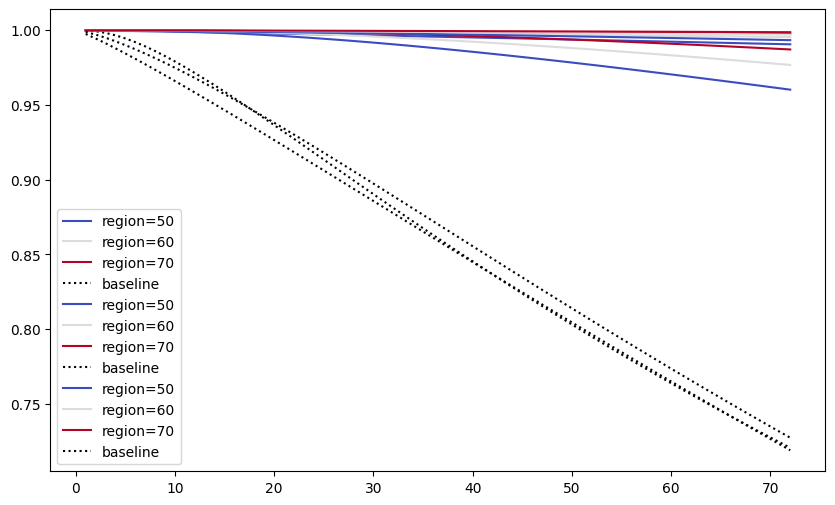

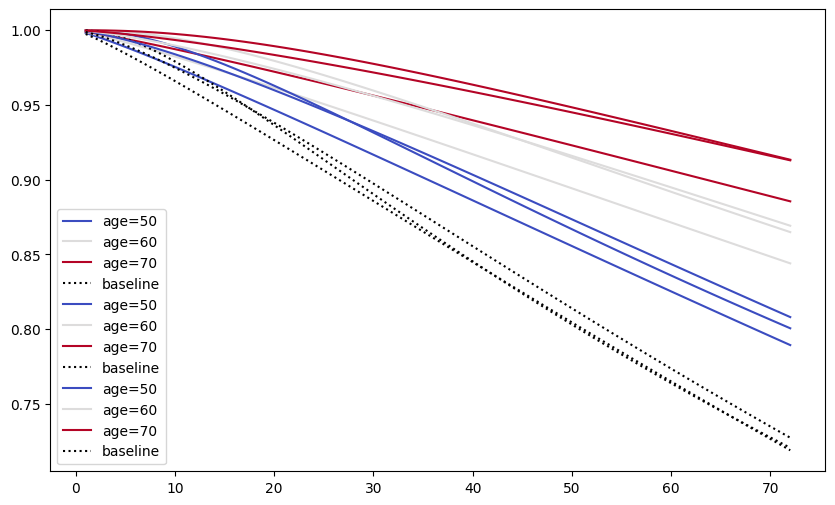

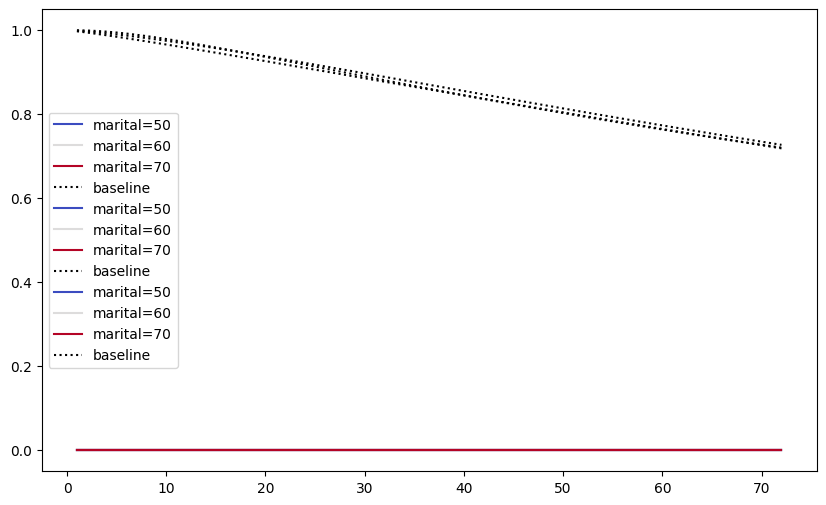

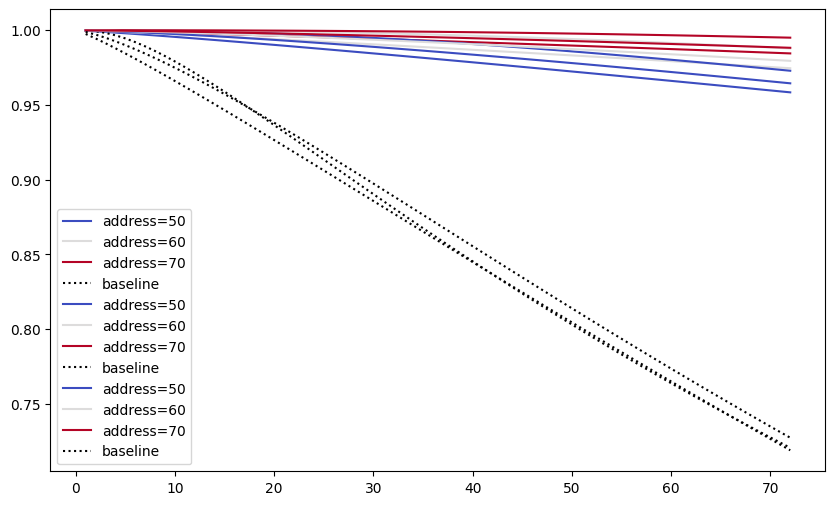

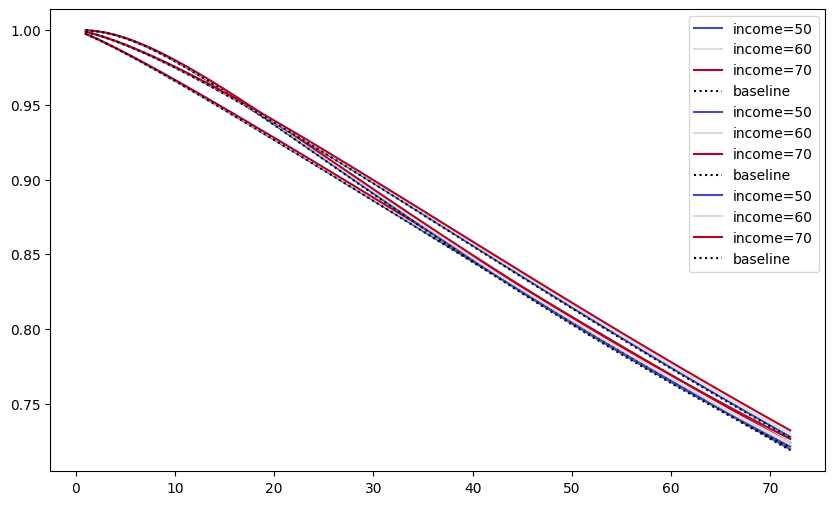

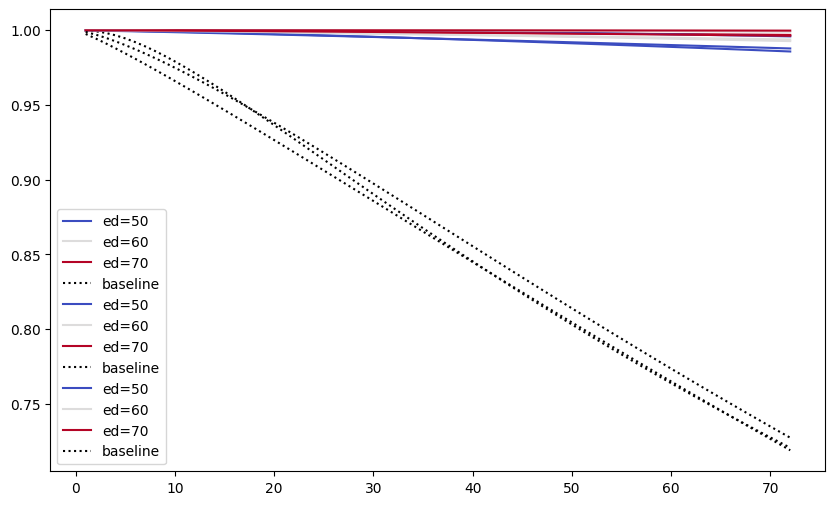

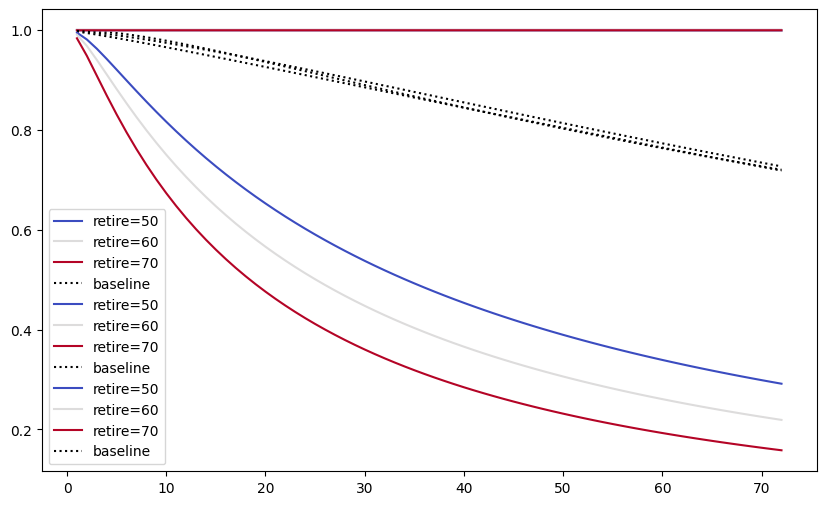

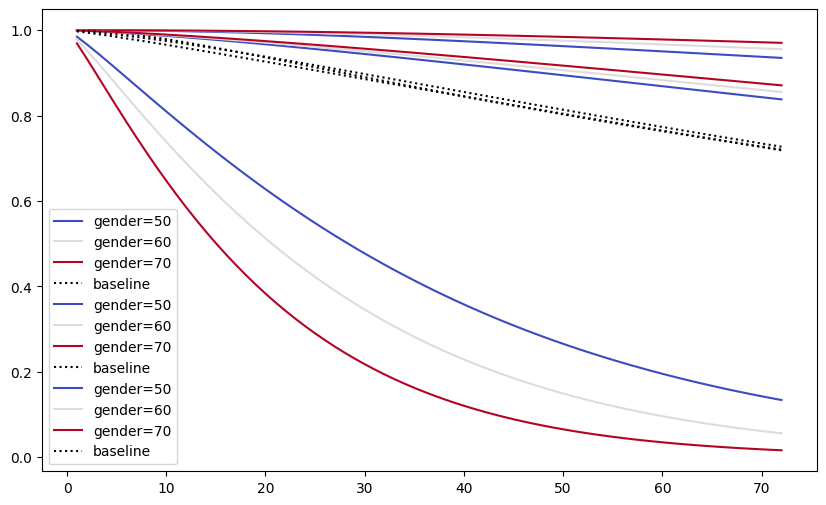

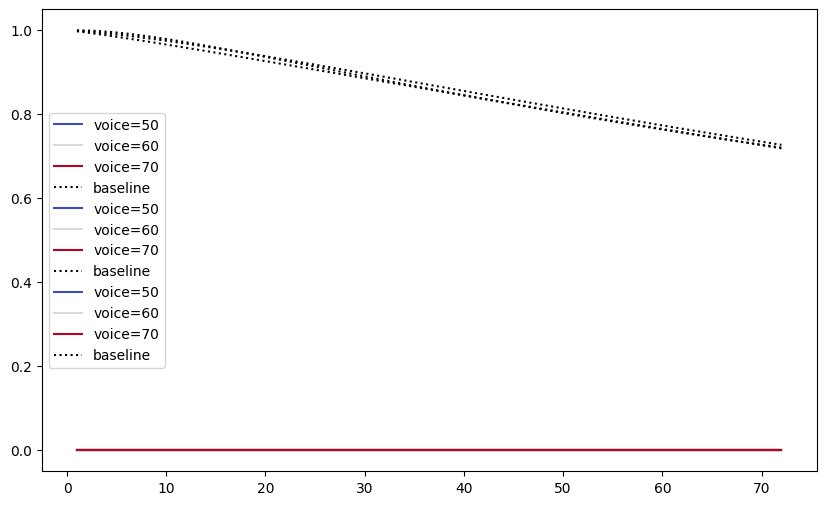

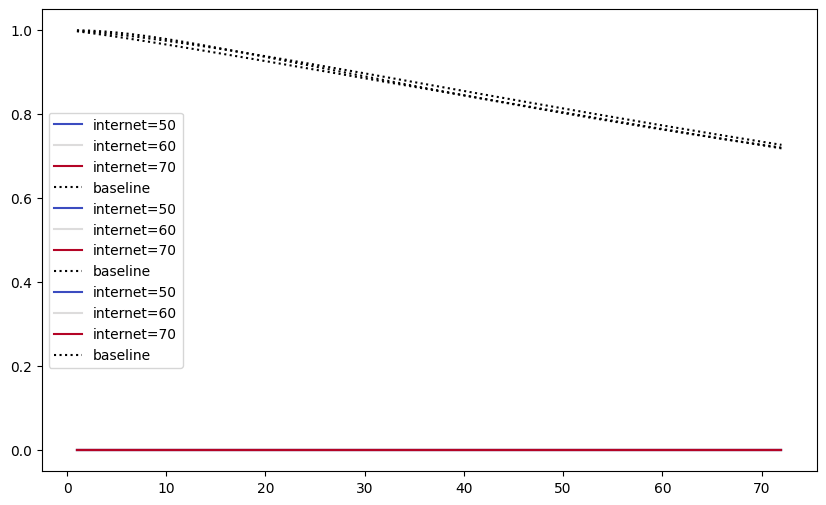

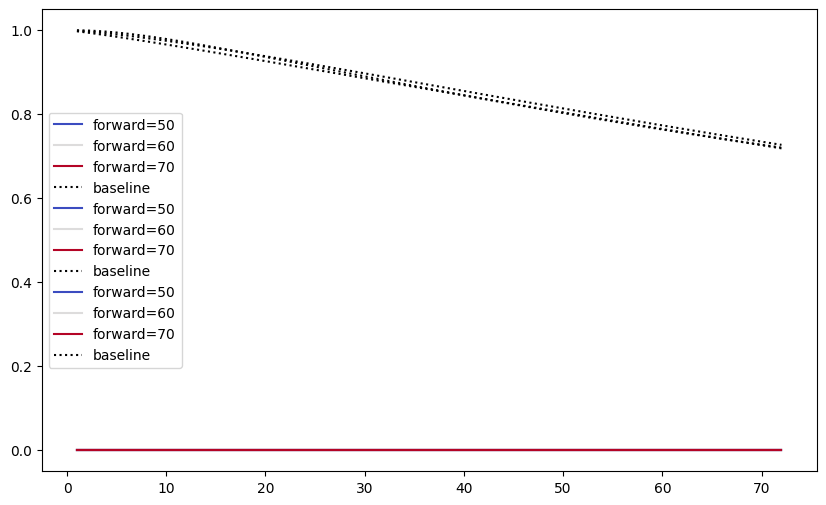

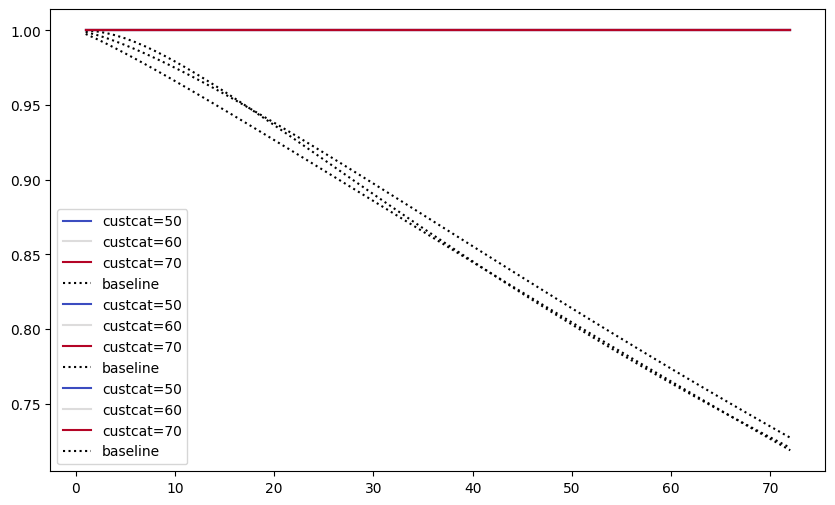

In [22]:
for col in df.columns:
    if col in ["tenure", "churn"]:
        continue
    fig, ax = plt.subplots(figsize=(10, 6))
    wb.plot_partial_effects_on_outcome(col, range(50, 80, 10), cmap='coolwarm', ax=ax)
    log.plot_partial_effects_on_outcome(col, range(50, 80, 10), cmap='coolwarm', ax=ax)
    loglogis.plot_partial_effects_on_outcome(col, range(50, 80, 10), cmap='coolwarm', ax=ax)
    plt.show()

## CLV

In [35]:
(surv := wb.predict_survival_function(df).iloc[:24].T)

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0,24.0
ID,,,,,,,,,,,,,,,,,,,,,
1,0.994945,0.988872,0.982370,0.975592,0.968615,0.961485,0.954238,0.946897,0.939482,0.932007,...,0.894116,0.886489,0.878859,0.871232,0.863611,0.855999,0.848401,0.840819,0.833256,0.825715
2,0.997020,0.993432,0.989581,0.985555,0.981398,0.977138,0.972794,0.968380,0.963907,0.959384,...,0.936221,0.931510,0.926780,0.922036,0.917277,0.912508,0.907730,0.902944,0.898153,0.893357
3,0.999538,0.998979,0.998378,0.997747,0.997094,0.996422,0.995734,0.995033,0.994319,0.993594,...,0.989838,0.989064,0.988284,0.987498,0.986707,0.985910,0.985108,0.984301,0.983490,0.982674
4,0.994046,0.986901,0.979260,0.971304,0.963123,0.954776,0.946302,0.937730,0.929083,0.920380,...,0.876451,0.867649,0.858857,0.850081,0.841325,0.832595,0.823894,0.815225,0.806592,0.797997
5,0.996436,0.992147,0.987547,0.982741,0.977784,0.972708,0.967537,0.962287,0.956971,0.951600,...,0.924177,0.918615,0.913038,0.907448,0.901848,0.896241,0.890628,0.885013,0.879397,0.873782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.992759,0.984081,0.974816,0.965185,0.955301,0.945235,0.935034,0.924737,0.914369,0.903955,...,0.851723,0.841323,0.830959,0.820637,0.810362,0.800140,0.789974,0.779870,0.769831,0.759859
997,0.990385,0.978893,0.966661,0.953986,0.941020,0.927861,0.914574,0.901208,0.887802,0.874385,...,0.807867,0.794781,0.781792,0.768908,0.756136,0.743483,0.730953,0.718550,0.706279,0.694144
998,0.999578,0.999068,0.998518,0.997942,0.997345,0.996731,0.996103,0.995462,0.994810,0.994147,...,0.990714,0.990007,0.989294,0.988575,0.987851,0.987122,0.986389,0.985651,0.984909,0.984163


In [40]:
r = float(input("Please enter discount rate"))
MM = float(input("Please enter monthly margin"))
(clv := (MM * np.sum(surv/np.power(1 + (r/12), np.arange(24)), axis=1)))

ID
1       20.000004
2       20.733452
3       21.672731
4       19.693341
5       20.523283
          ...    
996     19.265058
997     18.508317
998     21.688132
999     20.884381
1000    19.775935
Length: 1000, dtype: float64

In [47]:
wb.print_summary()

<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1475.19
         time fit was run = 2023-11-28 20:21:29 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ address     0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
        age         0.03       1.03       0.01             0.02             0.04                 1.02                 1.04
        custcat     0.34       1.41       0.07             0.20             0.48                 1.22                 1.62
        ed          0.06       1.06       0.04            -0.01             0.13                 0.99                 1.14
        forward    -0.33       0.72       0.14            -0.61            -0.05                 0.55                 0.95
        gender     -0.03       0.97       0.11            -0.24             0.18                 0.79                 1.20
        income      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet   -0.77       0.46       0.12            -1.01            -0.53                 0.37                 0.59
        marital    -0.41       0.67       0.11            -0.62            -0.20                 0.54                 0.82
        region      0.06       1.07       0.06            -0.06             0.19                 0.94                 1.21
        retire      0.22       1.25       0.54            -0.84             1.28                 0.43                 3.61
        voice      -0.45       0.64       0.14            -0.73            -0.18                 0.48                 0.84
        Intercept   3.19      24.32       0.27             2.67             3.71                14.42                41.03
rho_    Intercept   0.13       1.14       0.05             0.03             0.23                 1.03                 1.26

                    cmp to     z      p   -log2(p)
param   covariate                                 
lambda_ address       0.00  4.78 <0.005      19.11
        age           0.00  4.17 <0.005      14.99
        custcat       0.00  4.66 <0.005      18.26
        ed            0.00  1.67   0.10       3.39
        forward       0.00 -2.29   0.02       5.50
        gender        0.00 -0.30   0.77       0.38
        income        0.00  0.91   0.36       1.46
        internet      0.00 -6.36 <0.005      32.18
        marital       0.00 -3.78 <0.005      12.62
        region        0.00  0.99   0.32       1.63
        retire        0.00  0.40   0.69       0.54
        voice         0.00 -3.25 <0.005       9.74
        Intercept     0.00 11.96 <0.005     107.15
rho_    Intercept     0.00  2.61   0.01       6.81
---
Concordance = 0.78
AIC = 2978.39
log-likelihood ratio test = 262.47 on 12 df
-log2(p) of ll-ratio test = 161.00

In [48]:
log.print_summary()

<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1467.82
         time fit was run = 2023-11-28 20:21:29 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                         
mu_    address     0.04       1.05       0.01             0.03             0.06                 1.03                 1.06
       age         0.04       1.04       0.01             0.02             0.05                 1.02                 1.05
       custcat     0.44       1.56       0.08             0.28             0.61                 1.32                 1.84
       ed          0.06       1.06       0.04            -0.02             0.14                 0.98                 1.15
       forward    -0.39       0.68       0.17            -0.72            -0.06                 0.49                 0.95
       gender      0.03       1.03       0.12            -0.20             0.26                 0.81                 1.29
       income      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet   -0.80       0.45       0.13            -1.06            -0.55                 0.35                 0.58
       marital    -0.49       0.61       0.12            -0.72            -0.26                 0.49                 0.77
       region      0.03       1.03       0.07            -0.11             0.17                 0.90                 1.19
       retire     -0.03       0.97       0.45            -0.92             0.86                 0.40                 2.36
       voice      -0.64       0.53       0.16            -0.95            -0.32                 0.39                 0.73
       Intercept   2.66      14.34       0.28             2.11             3.22                 8.22                25.03
sigma_ Intercept   0.31       1.36       0.05             0.22             0.40                 1.24                 1.49

                   cmp to     z      p   -log2(p)
param  covariate                                 
mu_    address       0.00  4.90 <0.005      19.96
       age           0.00  4.80 <0.005      19.24
       custcat       0.00  5.32 <0.005      23.20
       ed            0.00  1.47   0.14       2.82
       forward       0.00 -2.29   0.02       5.50
       gender        0.00  0.22   0.83       0.27
       income        0.00  1.23   0.22       2.19
       internet      0.00 -6.15 <0.005      30.25
       marital       0.00 -4.13 <0.005      14.78
       region        0.00  0.45   0.65       0.62
       retire        0.00 -0.07   0.95       0.08
       voice         0.00 -3.93 <0.005      13.54
       Intercept     0.00  9.37 <0.005      66.96
sigma_ Intercept     0.00  6.69 <0.005      35.37
---
Concordance = 0.78
AIC = 2963.64
log-likelihood ratio test = 269.39 on 12 df
-log2(p) of ll-ratio test = 165.81

In [49]:
loglogis.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1469.43
         time fit was run = 2023-11-28 20:21:30 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                         
alpha_ address     0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age         0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat     0.43       1.53       0.08             0.27             0.59                 1.31                 1.80
       ed          0.05       1.05       0.04            -0.02             0.12                 0.98                 1.13
       forward    -0.38       0.68       0.16            -0.70            -0.07                 0.50                 0.94
       gender      0.01       1.01       0.11            -0.21             0.23                 0.81                 1.26
       income      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet   -0.82       0.44       0.13            -1.07            -0.58                 0.34                 0.56
       marital    -0.49       0.61       0.11            -0.71            -0.27                 0.49                 0.77
       region      0.06       1.06       0.07            -0.07             0.20                 0.93                 1.22
       retire      0.10       1.10       0.50            -0.88             1.08                 0.41                 2.93
       voice      -0.59       0.55       0.16            -0.89            -0.29                 0.41                 0.75
       Intercept   2.71      15.08       0.27             2.18             3.25                 8.85                25.69
beta_  Intercept   0.30       1.36       0.05             0.20             0.40                 1.23                 1.50

                   cmp to     z      p   -log2(p)
param  covariate                                 
alpha_ address       0.00  4.65 <0.005      18.21
       age           0.00  4.74 <0.005      18.83
       custcat       0.00  5.27 <0.005      22.81
       ed            0.00  1.32   0.19       2.42
       forward       0.00 -2.36   0.02       5.79
       gender        0.00  0.09   0.93       0.10
       income        0.00  0.97   0.33       1.59
       internet      0.00 -6.57 <0.005      34.26
       marital       0.00 -4.29 <0.005      15.76
       region        0.00  0.88   0.38       1.39
       retire        0.00  0.20   0.84       0.24
       voice         0.00 -3.80 <0.005      12.77
       Intercept     0.00  9.98 <0.005      75.48
beta_  Intercept     0.00  5.98 <0.005      28.71
---
Concordance = 0.78
AIC = 2966.85
log-likelihood ratio test = 271.56 on 12 df
-log2(p) of ll-ratio test = 167.32

We utilized the Accelerated Failure Time (AFT) model for our study, and then computed the Customer Lifetime Value (CLV) using the lifelines package in Python.   The Weibull accelerated failure time (AFT) model played a crucial role in our investigation by offering valuable insights into the duration until a certain event took place.   This model utilizes a Weibull distribution to represent the survival function, enabling us to estimate characteristics such as shape and size that describe the fundamental distribution of event timings.   The Weibull accelerated failure time (AFT) model is highly advantageous in situations when the rate of occurrence of an event varies with time. This makes it an adaptable and flexible tool for analyzing time-to-event data. 

In addition, we examined the Log-Normal Accelerated Failure Time (AFT) model and the Log-Logistic AFT model by utilizing the LogNormalAFTFitter() and LogLogisticAFTFitter() methods, respectively.   The Log-Normal Accelerated Failure Time (AFT) model postulates that the natural logarithm of survival times adheres to a normal distribution, whereas the Log-Logistic AFT model is predicated on the log-logistic distribution.   Through the application of these models to our data, we acquired a thorough comprehension of the fundamental survival distributions, enabling us to forecast the duration until a certain occurrence for individual observations.   Afterwards, using the knowledge gained from the AFT models, we continued to compute the client Lifetime worth (CLV), a vital measure in business analytics, to approximate the anticipated worth that a client brings to a corporation throughout their entire association with the organization.   The utilization of both AFT modeling and CLV computation in a two-step process has yielded a reliable framework for comprehending and forecasting client behavior within a time-to-event scenario. 